In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [ ]:
#Reading Data from csv file
df = pd.read_csv('Nifty50_Index_data.csv')
df.tail()

,Date,Open,High,Low,Close,Volume,pe_ratio,pb_ratio,dividend_yield
3504,2020-02-24,12012.55,12012.55,11813.40,11829.40,491224913,26.92,3.33,1.29
3505,2020-02-25,11877.50,11883.05,11779.90,11797.90,461349973,26.85,3.32,1.29
3506,2020-02-26,11738.55,11783.25,11639.60,11678.50,567990976,26.58,3.29,1.30
3507,2020-02-27,11661.25,11663.85,11536.70,11633.30,609266324,26.48,3.27,1.31
3508,2020-02-28,11382.00,11384.80,11175.05,11201.75,810523106,25.49,3.15,1.36


We create a few technical parameters for the base data the idea being the technical parameters are for buy/sell signals to generate buy/sell decisions.
The 2 technical parameters created for buy-sell signals are:
* SMA Signal
* EMA signal

In [ ]:
# calculating multi day SMA/EMA signal values for the data 

# simple moving average : 10 day,20 day,50 day periods 
df["sma10"] =  df.Close.rolling(window=10,min_periods = 1).mean().round(2)
df["sma20"] =  df.Close.rolling(window=20,min_periods = 1).mean().round(2)
df["sma50"] =  df.Close.rolling(window=50,min_periods = 1).mean().round(2)

# exp moving average calc : 10 day,20 day,50 day 
df['ema10'] = df.Close.ewm(span=10,adjust=False,min_periods=1).mean().round(2)
df['ema20'] = df.Close.ewm(span=20,adjust=False,min_periods=1).mean().round(2)
df['ema50'] = df.Close.ewm(span=50,adjust=False,min_periods=1).mean().round(2)



In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,pe_ratio,pb_ratio,dividend_yield,sma10,sma20,sma50,ema10,ema20,ema50
0,2006-01-02,2836.80,2849.45,2825.40,2835.95,51922369,17.16,4.37,1.56,2835.95,2835.95,2835.95,2835.95,2835.95,2835.95
1,2006-01-03,2835.95,2887.20,2832.05,2883.35,56919143,17.45,4.44,1.54,2859.65,2859.65,2859.65,2844.57,2840.46,2837.81
2,2006-01-04,2883.00,2909.35,2883.00,2904.40,82021279,17.58,4.48,1.53,2874.57,2874.57,2874.57,2855.45,2846.55,2840.42
3,2006-01-05,2904.45,2916.20,2884.80,2899.85,70082252,17.55,4.47,1.53,2880.89,2880.89,2880.89,2863.52,2851.63,2842.75
4,2006-01-06,2899.85,2921.70,2877.25,2914.00,83354445,17.64,4.49,1.52,2887.51,2887.51,2887.51,2872.70,2857.57,2845.54


In [ ]:
### below we calculate the 10,20,50 day simple moving average buy sell signals: 
### as our Technical Indicator this will be a binary variables

df['sma10sig'],df['sma20sig'],df['sma50sig'] = df.sma10,df.sma20,df.sma50

## here we will populate buy sell binary values for sma calls, if sma> close then buy ,else sell 
for i in range(len(df.Close)):
    if df.sma10[i] < df.Close[i]:
        df.sma10sig.loc[i] = 1
    else:
        df.sma10sig.loc[i] = 0
   
    if df.sma20[i] < df.Close[i]:
        df.sma20sig.loc[i] = 1
    else:
        df.sma20sig.loc[i] = 0
        
    if df.sma50[i] < df.Close[i]:
        df.sma50sig.loc[i] = 1
    else:
        df.sma50sig.loc[i] = 0
        


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
### below we calculate the 10,20,50 day exponential moving average buy sell signals  : as our Technical Indicator

## create dummy data variable
df['ema10sig'],df['ema20sig'],df['ema50sig'] = df.ema10,df.ema20,df.ema50

## here we will populate buy sell sig for ema calls, if ema > close then buy else sell 
for i in range(len(df.Close)):
    if df.ema10[i] < df.Close[i]:
        df.ema10sig.loc[i] = 1
    else:
        df.ema10sig.loc[i] = 0
   
    if df.ema20[i] < df.Close[i]:
        df.ema20sig.loc[i] = 1
    else:
        df.ema20sig.loc[i] = 0
        
    if df.ema50[i] < df.Close[i]:
        df.ema50sig.loc[i] = 1
    else:
        df.ema50sig.loc[i] = 0
         


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


### Now we calculate aditional technical indicators:
1.   Volatility
2.   Open Interest
3.   Momentum

In [ ]:
## volatility defined as percentage change from last day closing price
df['Volatility'] = round(df.Close.pct_change(periods=1,fill_method='pad') * 100 , 2)

## Momentum, which is 0 or 1 based on if last closing < current close or vice versa
df['Momentum'] = df.Volatility.apply(lambda x : 0 if (x<0) else 1)

## OI_change represents change in Volume
df['OI_change'] = df.Volume.diff(periods =1)

## OI_Volatility = percent change in OI/Volume 
df['OI_Volatility'] = round(df.Volume.pct_change(periods=1,fill_method='pad') * 100,2)

## OI_Momentum which is 0 or 1 based on if last Volume < current Volume or vice versa
df['OI_Momentum'] = df.OI_Volatility.apply(lambda x : 0 if (x<0) else 1)



In [ ]:
## Removing NA values
df.dropna(axis=0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3508 entries, 1 to 3508
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            3508 non-null   object 
 1   Open            3508 non-null   float64
 2   High            3508 non-null   float64
 3   Low             3508 non-null   float64
 4   Close           3508 non-null   float64
 5   Volume          3508 non-null   int64  
 6   pe_ratio        3508 non-null   float64
 7   pb_ratio        3508 non-null   float64
 8   dividend_yield  3508 non-null   float64
 9   sma10           3508 non-null   float64
 10  sma20           3508 non-null   float64
 11  sma50           3508 non-null   float64
 12  ema10           3508 non-null   float64
 13  ema20           3508 non-null   float64
 14  ema50           3508 non-null   float64
 15  sma10sig        3508 non-null   float64
 16  sma20sig        3508 non-null   float64
 17  sma50sig        3508 non-null   f

In [ ]:
## drop the sma,ema corr features set to reduce dimensinality since we already generated signal values from them :

df.drop(['sma10','sma20','sma50','ema10','ema20','ema50'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3508 entries, 1 to 3508
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            3508 non-null   object 
 1   Open            3508 non-null   float64
 2   High            3508 non-null   float64
 3   Low             3508 non-null   float64
 4   Close           3508 non-null   float64
 5   Volume          3508 non-null   int64  
 6   pe_ratio        3508 non-null   float64
 7   pb_ratio        3508 non-null   float64
 8   dividend_yield  3508 non-null   float64
 9   sma10sig        3508 non-null   float64
 10  sma20sig        3508 non-null   float64
 11  sma50sig        3508 non-null   float64
 12  ema10sig        3508 non-null   float64
 13  ema20sig        3508 non-null   float64
 14  ema50sig        3508 non-null   float64
 15  Volatility      3508 non-null   float64
 16  Momentum        3508 non-null   int64  
 17  OI_change       3508 non-null   f

In [ ]:
## convert date column to Index
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,pe_ratio,pb_ratio,dividend_yield,sma10sig,sma20sig,sma50sig,ema10sig,ema20sig,ema50sig,Volatility,Momentum,OI_change,OI_Volatility,OI_Momentum
1,2006-01-03,2835.95,2887.20,2832.05,2883.35,56919143,17.45,4.44,1.54,1.0,1.0,1.0,1.0,1.0,1.0,1.67,1,4996774.0,9.62,1
2,2006-01-04,2883.00,2909.35,2883.00,2904.40,82021279,17.58,4.48,1.53,1.0,1.0,1.0,1.0,1.0,1.0,0.73,1,25102136.0,44.10,1
3,2006-01-05,2904.45,2916.20,2884.80,2899.85,70082252,17.55,4.47,1.53,1.0,1.0,1.0,1.0,1.0,1.0,-0.16,0,-11939027.0,-14.56,0
4,2006-01-06,2899.85,2921.70,2877.25,2914.00,83354445,17.64,4.49,1.52,1.0,1.0,1.0,1.0,1.0,1.0,0.49,1,13272193.0,18.94,1
5,2006-01-09,2913.35,2927.25,2898.25,2910.10,74818404,17.62,4.49,1.52,1.0,1.0,1.0,1.0,1.0,1.0,-0.13,0,-8536041.0,-10.24,0


## Now we start final processing of data:  
#### We split first 3000 entries as training set and the rest and test set. 85-15% Train-Test Split.

In [ ]:
#Split the training and test set
training_set = df.loc[0:3000,:]
test_set = df.loc[3000:,:]
print('Training Set Shape:' + str(training_set.shape) ,'Test Set Shape:' + str(test_set.shape))

Training Set Shape:(3000, 20) Test Set Shape:(509, 20)


* Data is split into x-train, y-train and converted to numpy array for processing 
* Date column is removed from test,train set as it will not be an input of Model

In [ ]:
## we remove date column from in dataset and convert the numerical data to numpy array for processing 
training_set.set_index('Date',inplace=True)
test_set.set_index('Date',inplace=True)

## convert dataframe to np arrary for reshaping 
train_data = training_set.to_numpy()
test_data = test_set.to_numpy()
print('Training Set Shape:' + str(train_data.shape) ,'Test Set Shape:' + str(test_data.shape))

Training Set Shape:(3000, 19) Test Set Shape:(509, 19)


We use min max scaler class on the train and test datasets for normalization of data the train & test datasets are finalized for processing


In [ ]:
from sklearn.preprocessing import MinMaxScaler  ## import scalar 
scaler=MinMaxScaler(feature_range=(0,1))

## transforming dataframe for both training_set and test_set it will return final ndarray for reshape and input 
scaler1=MinMaxScaler(feature_range=(0,1))
scaler2=MinMaxScaler(feature_range=(0,1))
X_train  = scaler1.fit_transform(train_data)
X_test   = scaler2.fit_transform(test_data)
print('Training Set Shape:' + str(X_train.shape) ,'Test Set Shape:' + str(X_test.shape))

## Here we will extract y_train, as will be the close price, as we are predicting Close price  which is column 3 in array
y_train = X_train[:,3]
y_test = X_test[:,3]
print('y_train Set Shape:' + str(y_train.shape) ,'y_Test Set Shape:' + str(y_test.shape))


Training Set Shape:(3000, 19) Test Set Shape:(509, 19)
y_train Set Shape:(3000,) y_Test Set Shape:(509,)


# Feature Selection using SFS

In [ ]:
import sys
import joblib

sys.modules['sklearn.externals.joblib'] = joblib

In [ ]:
#Importing all required libraries and initializing Random Forest Regressor object
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_jobs= 4,oob_score= True)

In [ ]:
#Creating SFS Model and printing selected features
sfs1 = SFS(rf_model, 
           k_features=7, 
           forward=True, 
           floating=False, 
           scoring='neg_mean_squared_error',
           cv=5)
sfs1 = sfs1.fit(X_train[:,5:], y_train)
FeatureNames = ["Volume",
 "pe_ratio"  ,
 "pb_ratio"  ,
 "dividend_yield"  ,
 "sma10sig"  ,  
 "sma20sig"  ,
 "sma50sig"  ,
 "ema10sig"  ,
 "ema20sig"  ,
 "ema50sig"  ,
 "Volatility"  ,
 "Momentum"  ,
 "OI_change"  ,
 "OI_Volatility"  ,
 "OI_Momentum"
 ]
print('Selected features by SFS:')
SFSSelected_features=[]
for i in sfs1.k_feature_idx_:
  print(FeatureNames[i], "-", i)
  SFSSelected_features+=[[FeatureNames[i],i]]

# fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

# plt.title('Sequential Forward Selection (w. StdErr)')
# plt.grid()
# plt.show()

Selected features by SFS:
Volume - 0
pe_ratio - 1
pb_ratio - 2
sma10sig - 4
ema10sig - 7
Volatility - 10
OI_change - 12


# Feature Selection using Boruta

In [ ]:
pip install boruta

     |████████████████████████████████| 56 kB 2.5 MB/s 


In [ ]:
from boruta import BorutaPy as bp

In [ ]:
#Creating Boruta Model and printing selected features
rf_model = RandomForestRegressor(n_jobs= 4,oob_score= True)
feat_selector = bp(rf_model,n_estimators = 'auto', verbose= 0,max_iter= 100)
feat_selector.fit(X_train[:,5:], y_train)
BorutaSelected_features = [[FeatureNames[i],i] for i, x in enumerate(feat_selector.support_) if x]
print('Selected features by Boruta:')
for i in BorutaSelected_features:
  print(i[0],'-',i[1])

Selected features by Boruta:
Volume - 0
pe_ratio - 1
pb_ratio - 2
sma20sig - 5
ema20sig - 8
ema50sig - 9
Momentum - 11


# Feature Selection using Fisher Score Method

In [ ]:
!pip install skfeature-chappers

     |████████████████████████████████| 66 kB 2.7 MB/s 


In [ ]:
from skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as plt

In [ ]:
X_train[:,5:].shape

(3000, 14)

In [ ]:
%matplotlib inline
ranks=fisher_score.fisher_score(X_train[:,5:], y_train)
feat_importances=pd.Series(ranks,range(14))

In [ ]:
FisherSelected_features=[]
#print(feat_importances) - to print ranks

for i in range(len(feat_importances)):
  if feat_importances[i] > 8:
    print(FeatureNames[i], "-", i)
    FisherSelected_features+=[[FeatureNames[i],i]]

pe_ratio - 1
dividend_yield - 3
ema20sig - 8
Momentum - 11
OI_change - 12


# Feature Selection using Random Forest Importance

In [ ]:
model = RandomForestRegressor(n_jobs= 4,oob_score= True)
model.fit(X_train[:,5:],y_train)

RandomForestRegressor(n_jobs=4, oob_score=True)

In [ ]:
RFImportanceSelected_features = []
importances =model.feature_importances_
final_df=pd.DataFrame({"Features":list(range(14)),"Importances":importances})
final_df=final_df.sort_values("Importances",ascending=False)
df = final_df.head()
for i in df.Features:
  print(FeatureNames[i], "-", i)
  RFImportanceSelected_features+=[[FeatureNames[i],i]]


Volume - 0
pe_ratio - 1
pb_ratio - 2
ema50sig - 9
ema20sig - 8


# Selected Features that are common to both feature selection techniques

In [ ]:
CommonSelectedFeatures = [i for i in BorutaSelected_features for j in SFSSelected_features if i==j]
print('Common features that are selected by both SFS and Boruta Feature Selection are:')
for i in CommonSelectedFeatures:
   print(i[0],'-',i[1])

Common features that are selected by both SFS and Boruta Feature Selection are:
Volume - 0
pe_ratio - 1
pb_ratio - 2


# Price Prediction to verify and compare results of various feature selection models

##### We use LSTM (Long Short Term Memory), a class of recurrent neural networks, to perform this rice prediction. The LSTM layers expects input to be in a 3D matrix with the dimensions: [samples, time steps, features]. 

* Samples: These are independent observations from the domain, typically rows of data. 
* Time steps: These are separate time steps of a given variable for a given observation.    
* Features: These are separate measures observed at the time of observation. 

In [ ]:
import numpy as np

## Defining Different feature sets to run the LSTM Prediction model

In [ ]:
#Contains all features
X_trainALL = np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1]))
X_testALL = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))
print('X_trainALL Set Shape:' + str(X_trainALL.shape) ,'X_TestALL Set Shape:' + str(X_testALL.shape))

X_trainALL Set Shape:(3000, 1, 19) X_TestALL Set Shape:(509, 1, 19)


In [ ]:
#Contains features Selected by SFS Algorithm
X_trainSFS = []
X_testSFS = []
for i in SFSSelected_features:
  X_trainSFS+=[X_train[:,i[1]]]
  X_testSFS+=[X_test[:,i[1]]]
X_trainSFS = np.array(X_trainSFS).T
X_testSFS = np.array(X_testSFS).T
X_trainSFS = np.reshape(X_trainSFS,(X_trainSFS.shape[0],1,X_trainSFS.shape[1]))
X_testSFS = np.reshape(X_testSFS,(X_testSFS.shape[0],1,X_testSFS.shape[1]))
print('X_trainSFS Set Shape:' + str(X_trainSFS.shape) ,'X_TestSFS Set Shape:' + str(X_testSFS.shape))

X_trainSFS Set Shape:(3000, 1, 7) X_TestSFS Set Shape:(509, 1, 7)


In [ ]:
#Contains features Selected by Boruta Algorithm
X_trainBOR = []
X_testBOR = []
for i in BorutaSelected_features:
  X_trainBOR+=[X_train[:,i[1]]]
  X_testBOR+=[X_test[:,i[1]]]
X_trainBOR = np.array(X_trainBOR).T
X_testBOR = np.array(X_testBOR).T
X_trainBOR = np.reshape(X_trainBOR,(X_trainBOR.shape[0],1,X_trainBOR.shape[1]))
X_testBOR = np.reshape(X_testBOR,(X_testBOR.shape[0],1,X_testBOR.shape[1]))
print('X_trainBOR Set Shape:' + str(X_trainBOR.shape) ,'X_testBOR Set Shape:' + str(X_testBOR.shape))

X_trainBOR Set Shape:(3000, 1, 7) X_testBOR Set Shape:(509, 1, 7)


In [ ]:
#Contains features Selected by Random Forest Importance Algorithm
X_trainRFI = []
X_testRFI = []
for i in RFImportanceSelected_features:
  X_trainRFI+=[X_train[:,i[1]]]
  X_testRFI+=[X_test[:,i[1]]]
X_trainRFI = np.array(X_trainRFI).T
X_testRFI = np.array(X_testRFI).T
X_trainRFI = np.reshape(X_trainRFI,(X_trainRFI.shape[0],1,X_trainRFI.shape[1]))
X_testRFI = np.reshape(X_testRFI,(X_testRFI.shape[0],1,X_testRFI.shape[1]))
print('X_trainRFI Set Shape:' + str(X_trainRFI.shape) ,'X_testRFI Set Shape:' + str(X_testRFI.shape))

X_trainRFI Set Shape:(3000, 1, 5) X_testRFI Set Shape:(509, 1, 5)


In [ ]:
#Contains features Selected by Fisher's Score Algorithm
X_trainF = []
X_testF = []
for i in FisherSelected_features:
  X_trainF+=[X_train[:,i[1]]]
  X_testF+=[X_test[:,i[1]]]
X_trainF = np.array(X_trainF).T
X_testF = np.array(X_testF).T
X_trainF = np.reshape(X_trainF,(X_trainF.shape[0],1,X_trainF.shape[1]))
X_testF = np.reshape(X_testF,(X_testF.shape[0],1,X_testF.shape[1]))
print('X_trainF Set Shape:' + str(X_trainF.shape) ,'X_testF Set Shape:' + str(X_testF.shape))

X_trainF Set Shape:(3000, 1, 5) X_testF Set Shape:(509, 1, 5)


# Model exection starts here : we will do the following here

1.   Import all packages 
2.   Define the LSTM Model Parameters
3.   Define the LSTM Model Architecture
4.   Compile and Run the LSTM Model
5.   Track the outputs metrics for processing for n runs


In [ ]:
from sklearn.metrics import r2_score

# import the relevant Keras modules
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM 
import keras 

In [ ]:
## define LSTM MODEL base network model here 
## initialise model architecture :: training of LSTM  model begins 
## the model will run for n runs, each run with e epochs the putput params wil be averaged out

from sklearn.metrics import mean_absolute_error , r2_score
Dscore = {}

def PredictionAlgo(X_train,X_test,type1): 
  ## to be used for reverse scaling for predicted close price from the model vs the original data
  scale = MinMaxScaler() 
  ## here we copy class values used for scaling test set and use same values for scaling close price
  ## scaler2 instance was contains scaled parameters of test set ,this is used since scaler2 instance has paremetrs of all 16 Features, 
  ## we will extract only the parameter for close price scaling, this can be done for any parameters in list 

  scale.min_,scale.scale_ = scaler2.min_[0],scaler2.scale_[0] 

  epoch = 200 ## number of epochs
  validation_set = 0.2
  batch_size = 10  ## batch size per epoch run 

  training_loss = np.zeros(epoch)
  training_mae_loss = np.zeros(epoch)
  validation_Loss = np.zeros(epoch)
  validation_mae_loss =np.zeros(epoch)
  training_rmse_loss = np.zeros(epoch)
  training_msle_loss = np.zeros(epoch)
  predicted_average_price = np.zeros(len(y_test))


  ## -- define model layer parameters
  ## processing loop starts 

  model = Sequential()
  neurons = 128 
  dense_l1 = 64

  output_size = 1
  activ_func ='relu'
  activ_out_func ='linear'
  loss = keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")
  dropout = 0.2
  opt_adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
  

  ## -- create the model layer parameters 

  model.add(LSTM(units=neurons,activation=activ_func,return_sequences=True,recurrent_activation=activ_func,dropout=dropout,input_shape=(X_train.shape[1],X_train.shape[2])))  # size is 2000 x 1 x 5
  model.add(LSTM(units=neurons,activation=activ_func,return_sequences=True,dropout=dropout)) 
  model.add(LSTM(units=neurons,activation=activ_func,return_sequences=True,dropout=dropout)) 
  model.add(LSTM(units=neurons,activation=activ_func,return_sequences=True,dropout=dropout)) 
  model.add(LSTM(units=neurons,activation=activ_func,return_sequences=True,dropout=dropout)) 
  model.add(LSTM(units=neurons,activation=activ_func,return_sequences=True,dropout=dropout)) 
  model.add(LSTM(units=neurons,activation=activ_func,dropout=dropout)) 
  model.add(Dense(units=dense_l1,activation=activ_func))
  model.add(Dense(units=output_size,activation=activ_out_func))

  model.compile(loss=loss, optimizer=opt_adam,metrics=[keras.metrics.RootMeanSquaredError()])
  
  ## -- run the model here for n runs, e epochs , set verbose = 0 to disable output 

  model_history = model.fit(X_train,y_train,epochs=epoch,validation_split= validation_set , batch_size=batch_size, verbose=0, shuffle=False)

  ## predictions and R2 score calculation on model data
  ## ------------------------------------------------------------------------------------

  closing_price=model.predict(X_test)


  closing_price_scaled=scale.inverse_transform(closing_price)
  X2 = pd.DataFrame.copy(test_set)
  X2['Predictions']=closing_price_scaled

  # -----------------------------------------------------------------------------------
  ## here we will create a copy and for each run will add the output values final output

  training_loss = training_loss + model_history.history['loss']
  validation_Loss = validation_Loss + model_history.history['val_loss']
  training_rmse_loss= training_rmse_loss + model_history.history['root_mean_squared_error']
  predicted_average_price = predicted_average_price +  closing_price_scaled.reshape(len(y_test)) ## reshape the output array to scalar 

  # ------------------------------------------------------------------------

      ## processing loop stops 


  print("LSTM Model execution finished")

  ## create final dataset with all values as above and write to file
  New_Labels=['training_loss','validation_Loss','training_rmse_loss']
  df_out =  pd.DataFrame([training_loss,validation_Loss,training_rmse_loss],index=None)
  df_out = df_out.transpose()
  df_out.columns = New_Labels
  print()
  print(df_out.head())
  print()

  ## here we prepare the test predicted/original close prices for output
  df_pred = pd.DataFrame()
  New_Labels=['Date','Original_Close','Predicted_close']
  df_pred = pd.DataFrame.copy(test_set)
  df_pred['Predicted_Close_price'] = predicted_average_price.round(2)
  df_pred = df_pred.filter(items=['Close', 'Predicted_Close_price'])
  print(df_pred.head())

  ## here we set jupyter  parameters for plotting data  

  plt.rc('font', size=10)          # controls default text sizes
  plt.rc('axes', titlesize=14)     # fontsize of the axes title
  plt.rc('axes', labelsize=12)    # fontsize of the x and y labels
  plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
  plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
  plt.rc('legend', fontsize=12)    # legend fontsize
  plt.rc('figure', titlesize=14)  # fontsize of the figure title

  # Plot the LSTM Real Close Price and the Predicted Prices against Date 
  plt.figure(figsize=(16,8))
  plt.plot(df_pred.index,df_pred.Close, label='Real Close',color='royalblue',linewidth=2)
  plt.plot(df_pred.index,df_pred.Predicted_Close_price, label='Predicted Close',color='crimson',linewidth=2)
  plt.ylabel("Closing Price in INR")
  plt.xlabel("Date Year-Month")
  plt.title("Model Output:Real vs Predicted Prices")
  plt.legend()
  plt.show()

  ## for plotting set the variables 
  df_out['epochs'] = np.arange(epoch)

  plt.figure(figsize=(16,8))
  plt.plot(df_out.epochs,df_out.training_loss, label='Training Loss:MSE',color='royalblue',linewidth=2)
  plt.ylabel("Loss Value")
  plt.xlabel("Number of Epochs")
  plt.title("Model Output: Training Loss ")
  plt.legend()
  plt.show()

  plt.figure(figsize=(16,8))
  plt.plot(df_out.epochs,df_out.training_rmse_loss, label='Metric:RMSE',color='royalblue',linewidth=2)
  plt.ylabel("Loss Value")
  plt.xlabel("Number of Epochs")
  plt.title("Model Output:Metric Root Mean Square Error")
  plt.legend()
  plt.show()

  from sklearn.metrics import r2_score
  pred= r2_score(df_pred.Close,df_pred.Predicted_Close_price)*100 
  print("R2 Score for Model : " , pred.round(4))
  Dscore[type1] = pred.round(4)

LSTM Model execution finished

   training_loss  validation_Loss  training_rmse_loss
0       0.038332         0.039828            0.195786
1       0.037474         0.077291            0.193583
2       0.033635         0.086491            0.183400
3       0.032612         0.088110            0.180588
4       0.032682         0.088800            0.180781

               Close  Predicted_Close_price
Date                                       
2018-02-06  10498.25               10417.55
2018-02-07  10476.70               10512.99
2018-02-08  10576.85               10529.11
2018-02-09  10454.95               10413.99
2018-02-12  10539.75               10503.14


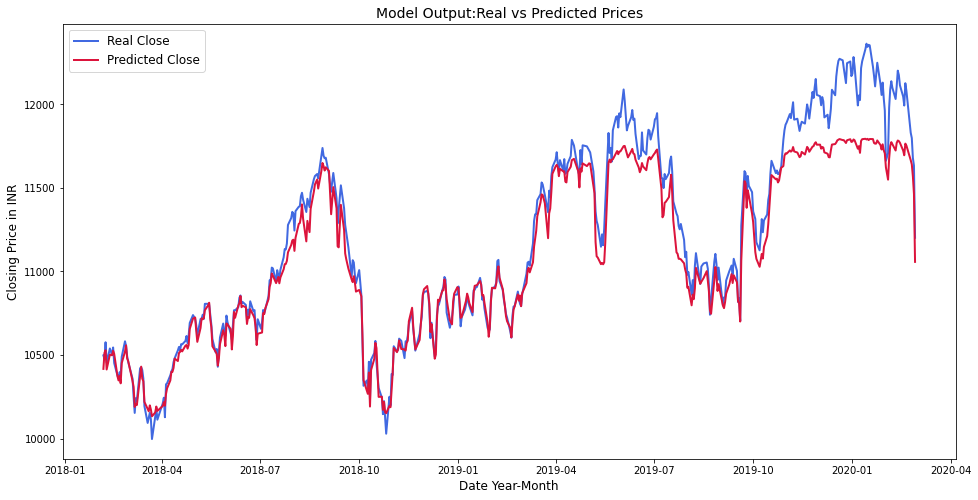

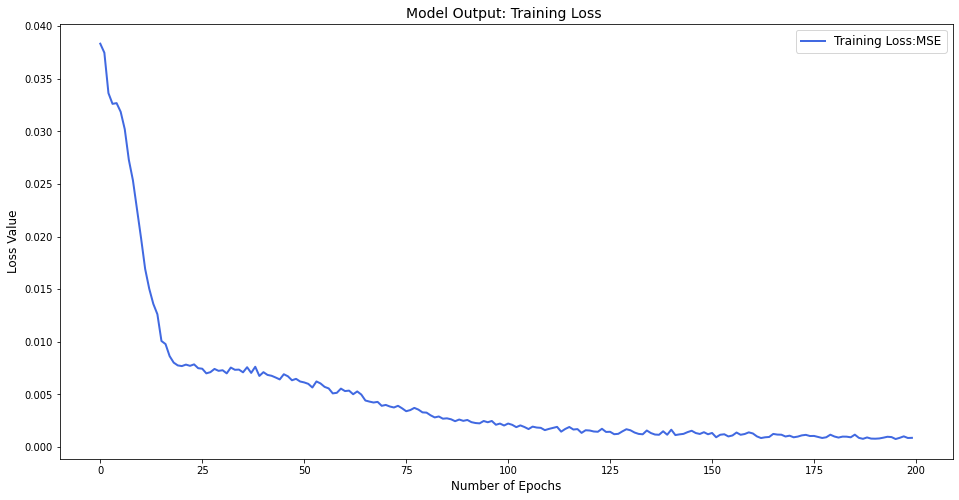

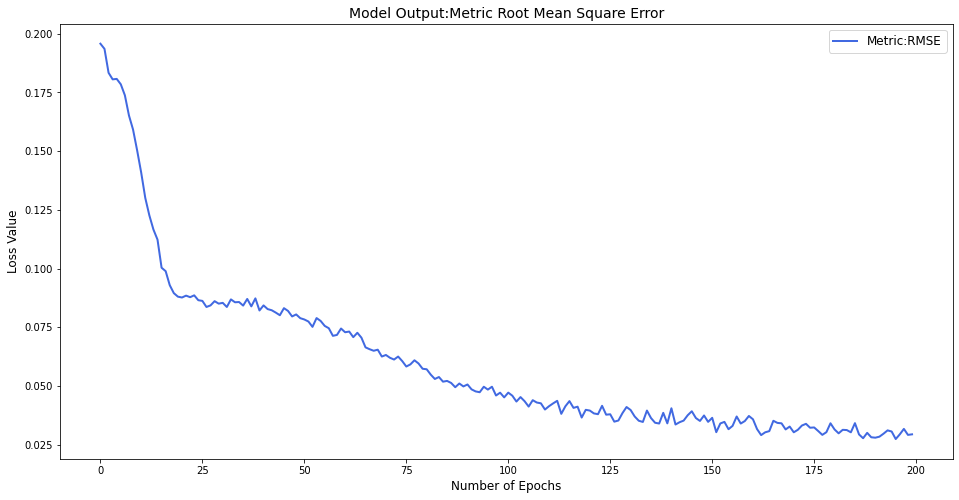

R2 Score for Model :  92.5449


In [ ]:
#Running Prediction Algo using all features
PredictionAlgo(X_trainALL, X_testALL, 'All')

LSTM Model execution finished

   training_loss  validation_Loss  training_rmse_loss
0       0.030533         0.018601            0.174737
1       0.041343         0.071159            0.203330
2       0.033647         0.080022            0.183431
3       0.032626         0.081430            0.180626
4       0.032672         0.084186            0.180753

               Close  Predicted_Close_price
Date                                       
2018-02-06  10498.25               10533.09
2018-02-07  10476.70               10629.71
2018-02-08  10576.85               10650.89
2018-02-09  10454.95               10536.98
2018-02-12  10539.75               10600.50


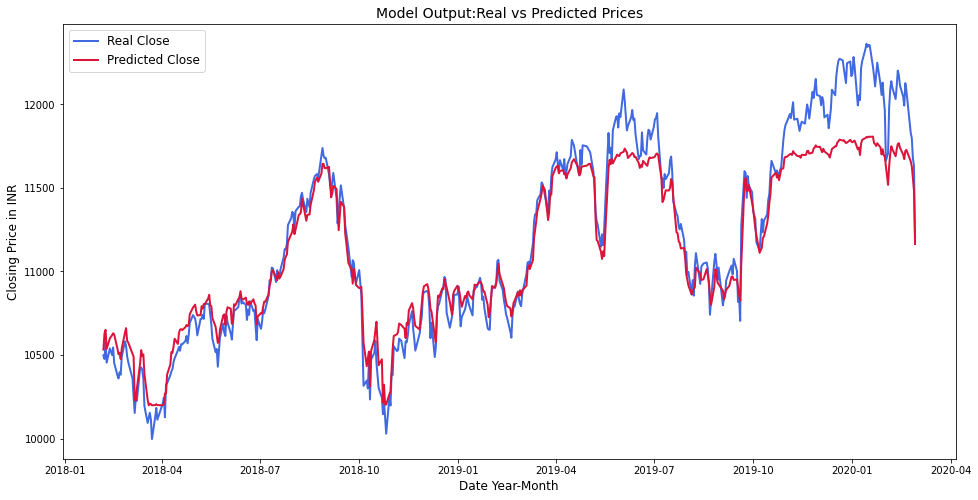

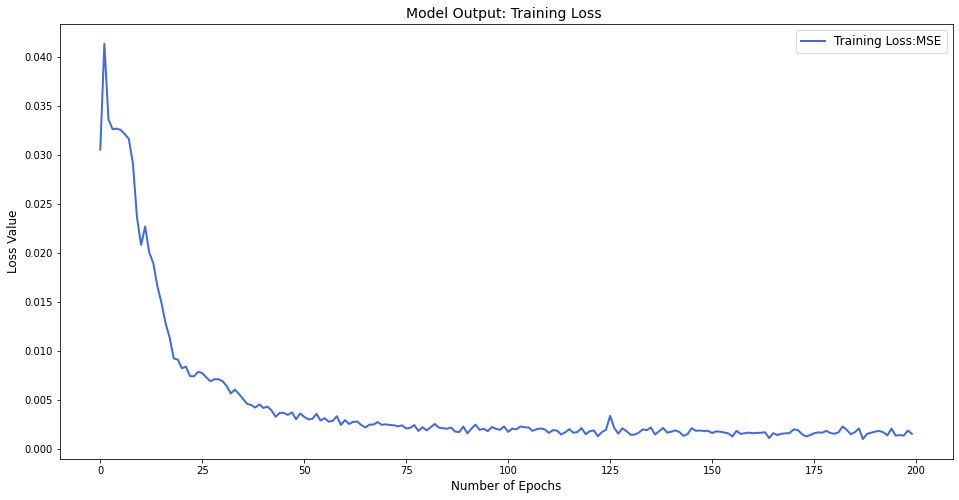

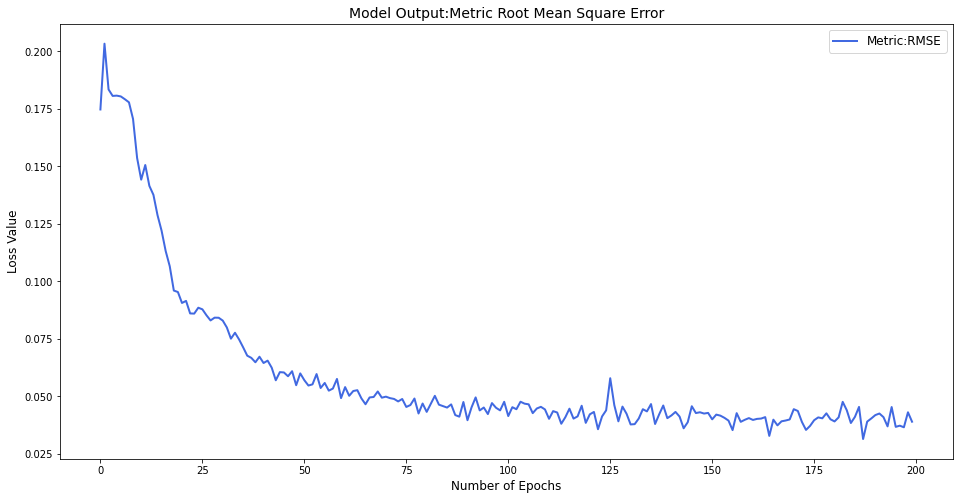

R2 Score for Model :  91.8426


In [ ]:
#Running Prediction Algo using features selected by SFS
PredictionAlgo(X_trainSFS, X_testSFS, 'SFS')

LSTM Model execution finished

   training_loss  validation_Loss  training_rmse_loss
0       0.036587         0.025574            0.191278
1       0.039397         0.072784            0.198486
2       0.033079         0.079200            0.181876
3       0.032708         0.082267            0.180852
4       0.032724         0.084071            0.180898

               Close  Predicted_Close_price
Date                                       
2018-02-06  10498.25               10587.84
2018-02-07  10476.70               10683.89
2018-02-08  10576.85               10669.62
2018-02-09  10454.95               10586.11
2018-02-12  10539.75               10655.32


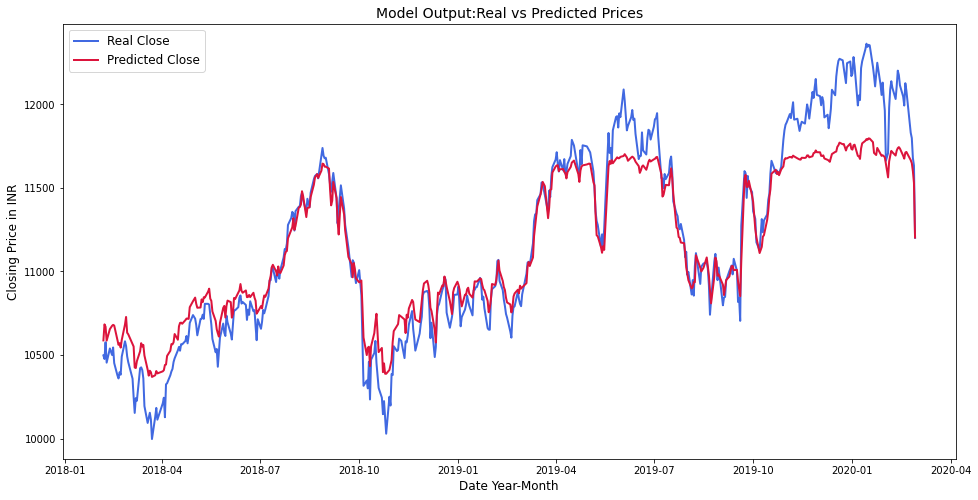

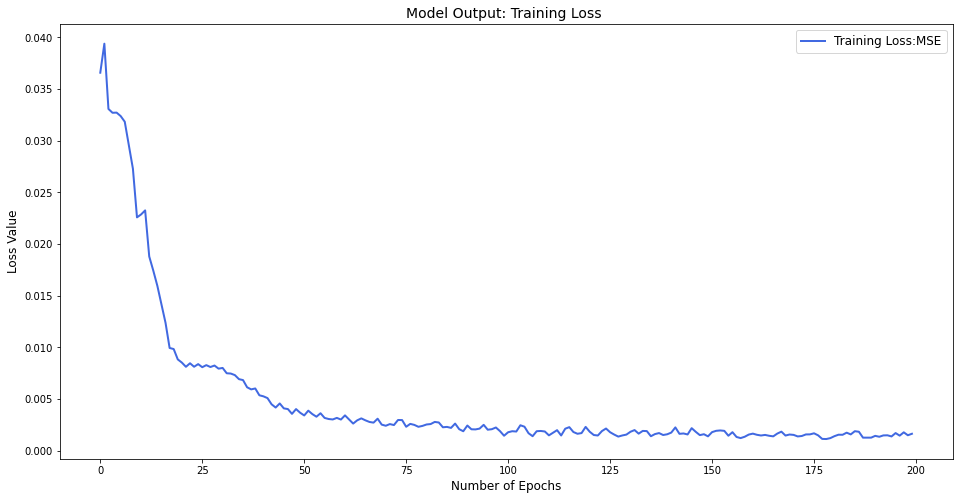

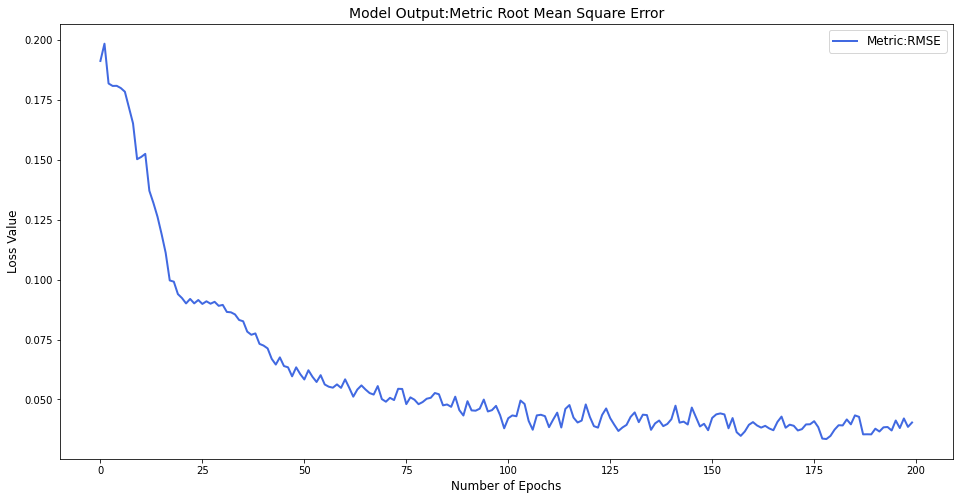

R2 Score for Model :  89.753


In [ ]:
#Running Prediction Algo using features selected by Boruta
PredictionAlgo(X_trainBOR, X_testBOR, 'Boruta')

LSTM Model execution finished

   training_loss  validation_Loss  training_rmse_loss
0       0.025582         0.014707            0.159944
1       0.042472         0.067144            0.206088
2       0.033752         0.077559            0.183717
3       0.032803         0.080397            0.181116
4       0.032559         0.081611            0.180441

               Close  Predicted_Close_price
Date                                       
2018-02-06  10498.25               10512.26
2018-02-07  10476.70               10585.59
2018-02-08  10576.85               10591.83
2018-02-09  10454.95               10504.77
2018-02-12  10539.75               10564.69


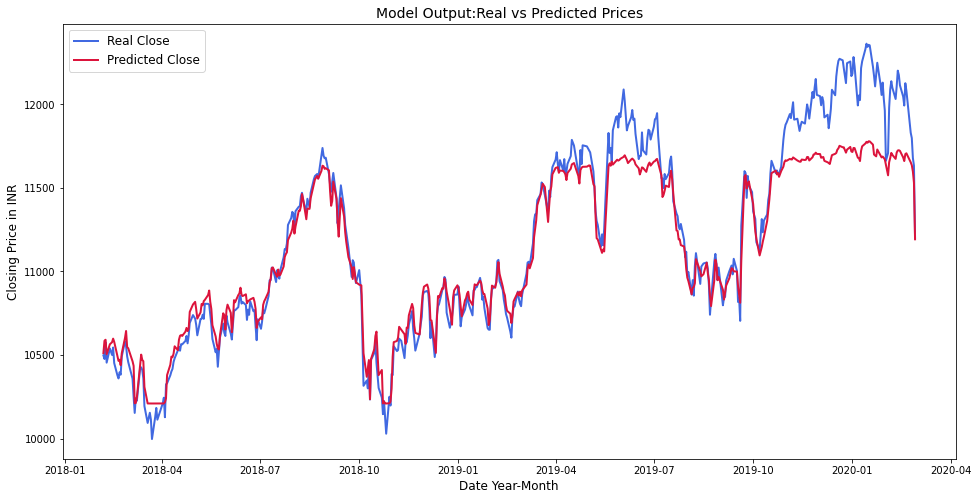

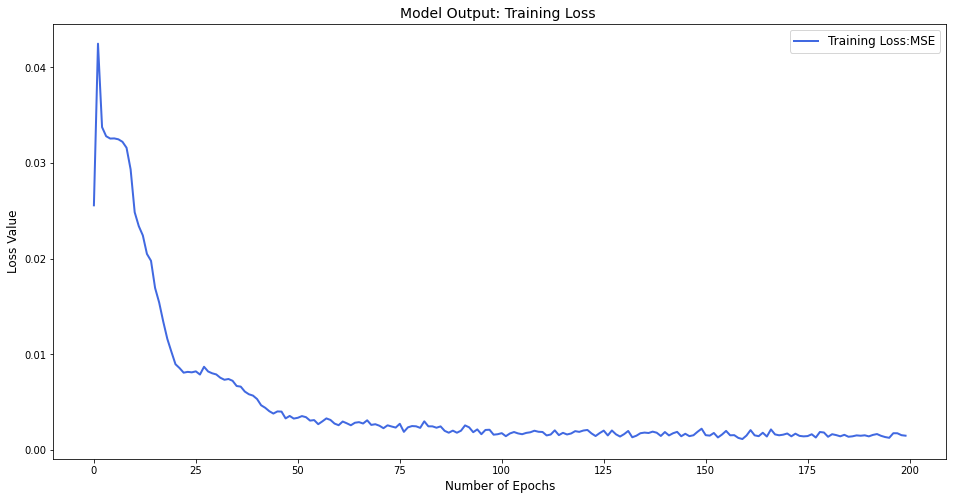

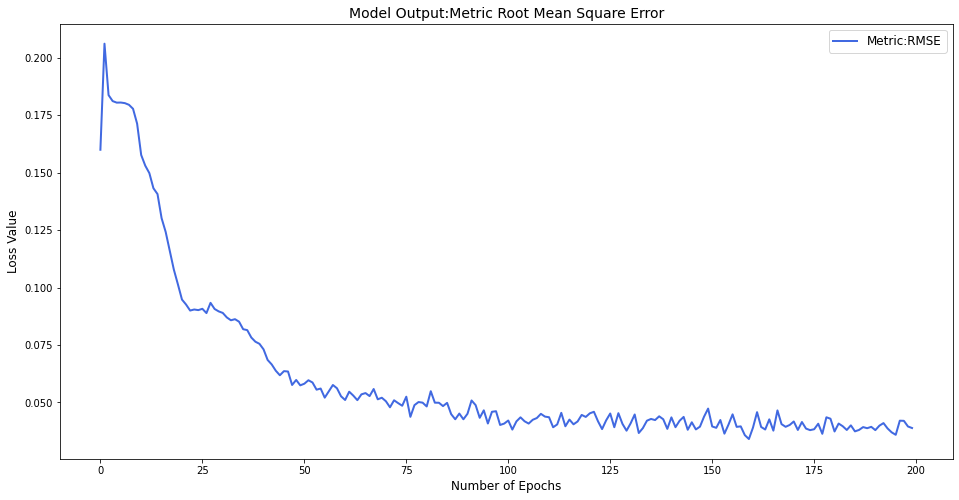

R2 Score for Model :  91.015


In [ ]:
#Running Prediction Algo using features selected by Random Forest Importance
PredictionAlgo(X_trainRFI, X_testRFI, 'RandomForestImportance')

LSTM Model execution finished

   training_loss  validation_Loss  training_rmse_loss
0       0.030210         0.020236            0.173809
1       0.041980         0.077302            0.204890
2       0.033254         0.083782            0.182357
3       0.032512         0.084628            0.180310
4       0.032653         0.087702            0.180701

               Close  Predicted_Close_price
Date                                       
2018-02-06  10498.25               10622.57
2018-02-07  10476.70               10629.66
2018-02-08  10576.85               10665.04
2018-02-09  10454.95               10534.06
2018-02-12  10539.75               10611.48


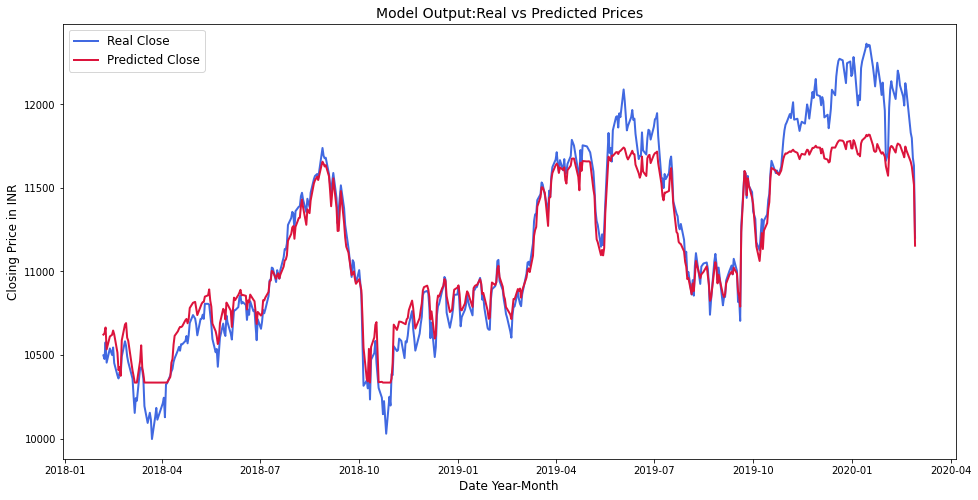

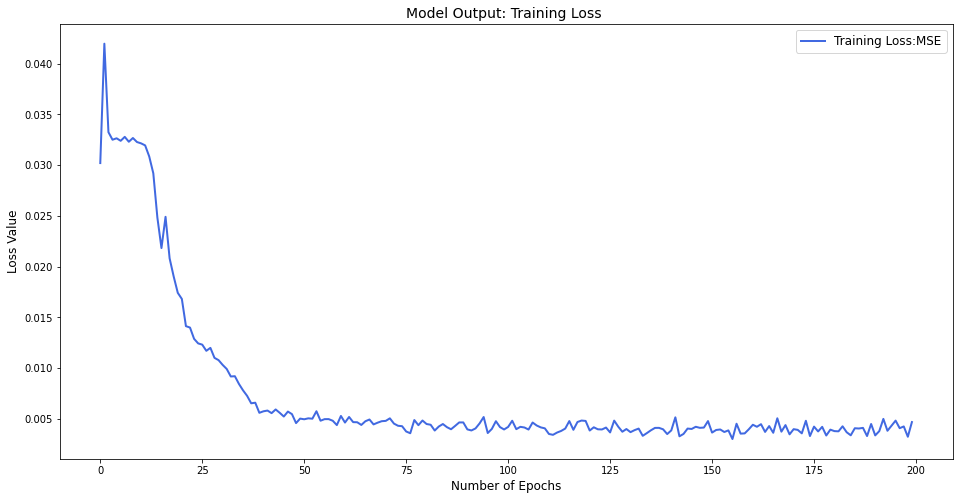

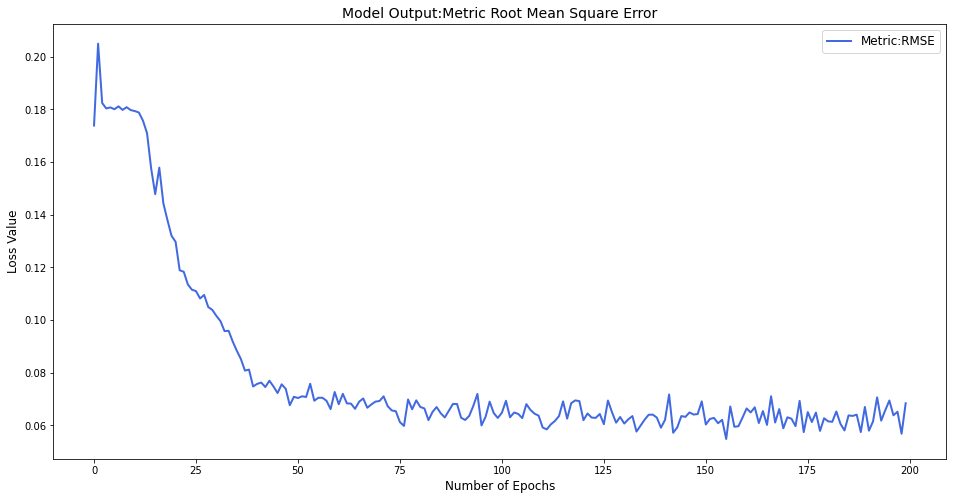

R2 Score for Model :  91.8948


In [ ]:
#Running Prediction Algo using features selected by Fisher's Score
PredictionAlgo(X_trainF, X_testF, 'Fisher')

LSTM Model execution finished

   training_loss  validation_Loss  training_rmse_loss
0       0.029029         0.016312            0.170378
1       0.042544         0.073371            0.206261
2       0.032635         0.075860            0.180651
3       0.032923         0.080438            0.181447
4       0.032754         0.084313            0.180981

               Close  Predicted_Close_price
Date                                       
2018-02-06  10498.25               10477.34
2018-02-07  10476.70               10585.96
2018-02-08  10576.85               10576.14
2018-02-09  10454.95               10481.97
2018-02-12  10539.75               10557.44


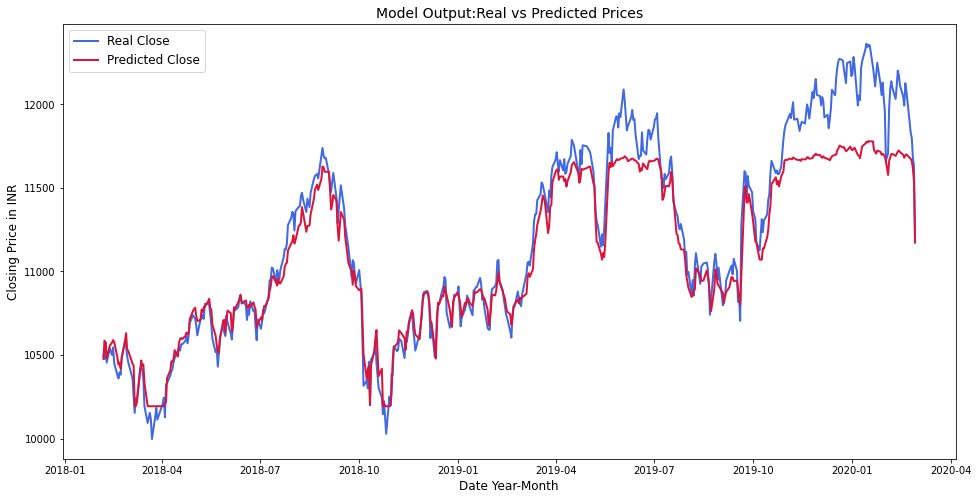

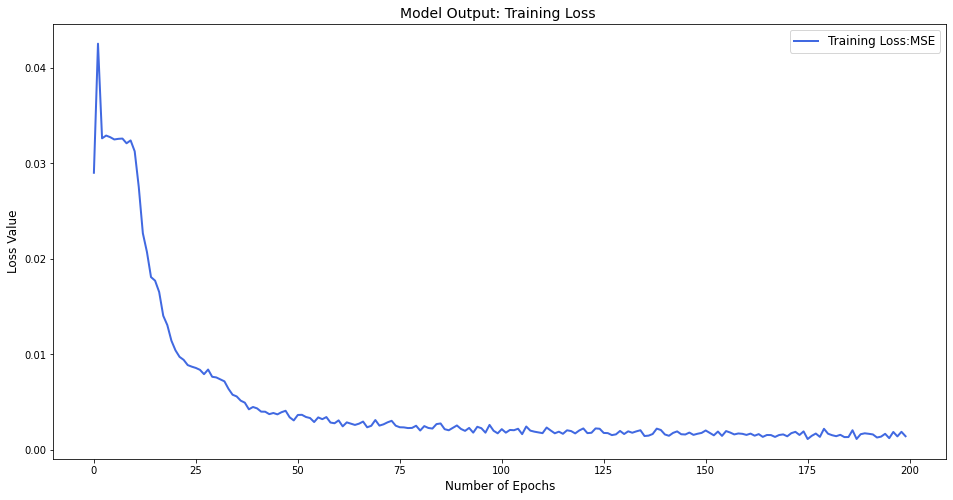

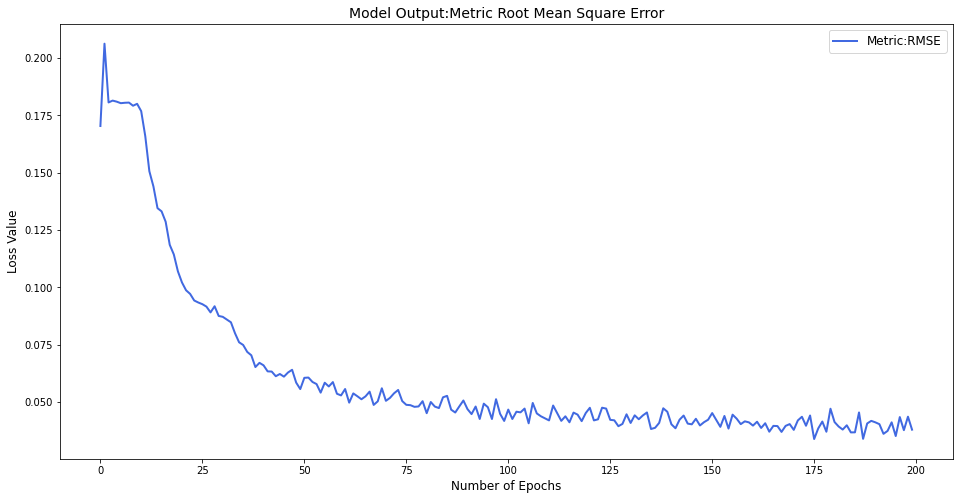

R2 Score for Model :  90.6224


In [ ]:
#Running Prediction Algo using features selected by bpth SFS and Boruta
PredictionAlgo(X_trainCOM, X_testCOM, 'Common')

In [ ]:
#Comparing final r2 scores
final = pd.DataFrame(Dscore, index=[0])
final

,All,SFS,Boruta,RandomForestImportance,Fisher,Common
0,92.5449,91.8426,89.753,91.015,91.8948,90.6224


In [ ]:
FC = {}
def addFeatures(x):
  for i in x:
    if i[0] not in FC:
      FC[i[0]]=1
    else:
      FC[i[0]]+=1

addFeatures(SFSSelected_features)
addFeatures(BorutaSelected_features)
addFeatures(RFImportanceSelected_features)
addFeatures(FisherSelected_features)

In [ ]:
print("The features and their frequency is")
for i in FC:
  print(i,' - ', FC[i])

The features and their frequency is
Volume  -  3
pe_ratio  -  4
pb_ratio  -  3
sma10sig  -  1
sma50sig  -  1
Volatility  -  1
OI_Volatility  -  1
sma20sig  -  1
ema20sig  -  2
ema50sig  -  2
Momentum  -  3
dividend_yield  -  1
OI_change  -  1


In [ ]:
print("The final selected features of highest importance are")
FinalFeatures = [(k, v) for k, v in FC.items()]
FinalFeatures.sort(key= lambda x: x[1], reverse=True)
for i in FinalFeatures:
  print(i[0])

The final selected features of highest importance are
sma10sig
sma50sig
Volatility
OI_Volatility
sma20sig
dividend_yield
OI_change
ema20sig
ema50sig
Volume
pb_ratio
Momentum
pe_ratio


In [ ]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('AIProject.ipynb')